<a href="https://colab.research.google.com/github/ashutoshgithubs/Machine-Learning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
!pip install tensorflow[and-cuda]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.3/363.3 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 895.7/895.7 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.2/577.2 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.3/130.3 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.6/217.6 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 58.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.6.85
    Uninstalli

In [3]:
import tensorflow as tf
print(tf.__version__)

2.19.0


##Importing some basic libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')

In [21]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Divide the dataset into dependent and independent features

In [22]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [23]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [24]:
# Feature engineering
geography = pd.get_dummies(X['Geography'], drop_first=True)
# drop_first=True -> it will remove the 1st col. (France column) and whenever France column value is True
# both other columns value become false.
gender = pd.get_dummies(X['Gender'], drop_first=True)


In [25]:
gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [26]:
# Now remove the geography & gender col from the dataframe
X.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [27]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [28]:
# concatenate these OHE (geography & gender) in dataframe
X = pd.concat([X, geography, gender], axis=1)

In [29]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [30]:
X.shape

(10000, 11)

### Spliting the dataset in training set & test set

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

#### Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
# Why fit applied to training only -> to avoid data leakage.
X_test = sc.transform(X_test)

In [34]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [35]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [36]:
X_train.shape

(8000, 11)

In [37]:
y_test.shape

(2000,)

## Part2 -> Lets create ANN

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense #Dense->to cerate i/p,hidden & o/p layers
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout # TO reduce overfitting(Overtrained->training accuracy is good but testing accuracy is bad)

In [76]:
# Lets initialize the ANN
classifier = Sequential() # classifier is my model

In [77]:
# Adding the i/p layer
classifier.add(Dense(units=11, activation='relu')) # Here this activation is applied to the next layer.

In [78]:
# Adding the first hidden laye with 6 neurons
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.2)) # To prevent overfitting
# Here 20% of the neurons in the layer are randomly deactivated during each training step.

In [79]:
# Adding the second hidden layer with 6 neurons
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.3))

In [80]:
# Adding the output layer with 1 layer
classifier.add(Dense(units=1, activation='sigmoid'))


In [81]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# here adam will use learning rate = 0.01 by default

In [82]:
# To create the learning rate by own -> Optional Step.
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01); # Assign whatever value u want then in the
# above cell put optimizer = opt.

### So when we use 1000 epoch its takes too much time to tain the model even though the acuracy is not improving more as it will complete the entire epochs. So to avoid the training time, we use Early_Stopping. it will automatically stop the training when the accuracy is not improving more at any epoch.

In [83]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
)

In [84]:
# Lets train the ANN Model definied in cell 46.
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10,epochs=1000, callbacks= early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7627 - loss: 0.5793 - val_accuracy: 0.7955 - val_loss: 0.4811
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7886 - loss: 0.4978 - val_accuracy: 0.7955 - val_loss: 0.4551
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7946 - loss: 0.4641 - val_accuracy: 0.7955 - val_loss: 0.4467
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8042 - loss: 0.4454 - val_accuracy: 0.7955 - val_loss: 0.4409
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7921 - loss: 0.4556 - val_accuracy: 0.7955 - val_loss: 0.4374
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7901 - loss: 0.4474 - val_accuracy: 0.7955 - val_loss: 0.4334
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7916 - loss: 0.4376 - val_accuracy: 0.7955 - val_loss: 0.4287
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8002 - loss: 0.4274 - 

### Explanation of the above cell

1. classifier.fit(): This is the method used to train the model.

2. X_train: This is the training data (your independent features).

3. y_train: This is the training labels (your dependent variable, 'Exited').

4. validation_split=0.33: This reserves 33% of the training data for validation during training. The model will be evaluated on this data at the end of each epoch, but it won't be used for training.

In [85]:
  model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

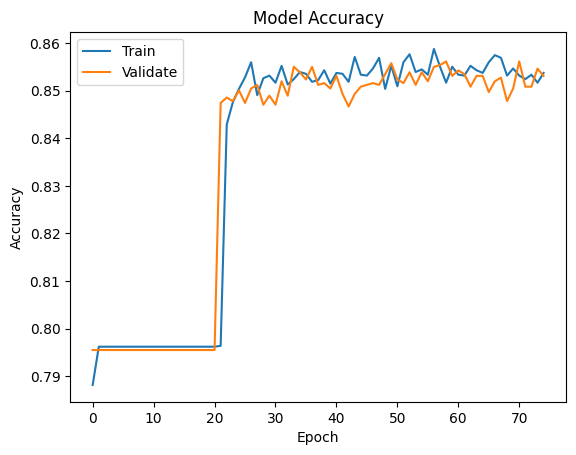

In [86]:
# Lets visualize the training and validation accuracy over the epochs.
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

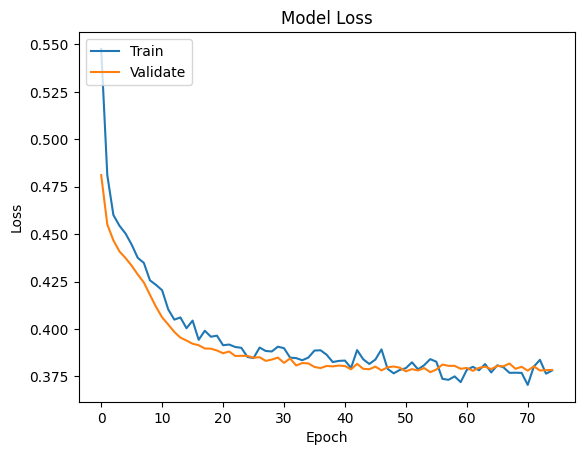

In [87]:
# Lets visualize the training and validation loss over the epochs.
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

## Part3: Making the prediction and evaluating the model

In [88]:
# Predicting the test set result
y_pred = classifier.predict(X_test) # classifier is my model.
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [89]:
# Making the confusion matrix -> To evaluate the performance of a classification model -> TP,TN,FP,FN
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1497,   98],
       [ 198,  207]])

In [90]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [91]:
score

0.852

In [92]:
# Lets get the weights
classifier.get_weights()

[array([[ 0.19982459, -0.11837827,  0.00529996, -0.18922755, -0.20998451,
          0.05565119,  0.56087554,  0.01660367, -0.19096069, -0.06504659,
         -0.16184638],
        [ 0.03371554,  0.61969125,  0.12672183, -0.12767461, -0.44573668,
         -0.30562273,  0.00148948, -0.72063595,  0.65376604,  0.4667692 ,
          0.55945295],
        [ 0.23977184, -0.00828268,  0.01450781,  0.08382425,  0.21129058,
          0.24427104,  0.08544395, -0.04582825,  0.28929776, -0.08927137,
          0.10386107],
        [-0.45674658, -0.04938709,  0.22376229, -0.25644028, -0.13648827,
          0.5327829 , -0.23918888, -0.13015099, -0.47640184,  0.26892525,
         -0.6466544 ],
        [ 0.8735163 ,  0.17938569,  1.0623404 ,  0.68101895,  0.17836373,
         -0.04030086,  0.5635988 ,  0.24714977,  0.04547264,  0.5954493 ,
         -0.93933475],
        [ 0.13273838,  0.08997706, -0.07106277, -0.04850699,  0.1351503 ,
          0.28430766,  0.09201791,  0.00825035, -0.13761647, -0.0081119